In [48]:
# import Required modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar

In [49]:
# Import  sales data file 

# It amazon electronic sales data from kaggle.com 

# Link of the data sent : https://www.kaggle.com/datasets/edusanketdk/electronics

# The dataset gives us electronics sales data at Amazon. It contains user ratings for various electronics items sold, along with category of each item and time of sell.

data = pd.read_csv(r"./electronics.csv")


In [50]:
# First 5 rows and last 5 rows

print(data.head())

print(data.tail())

   item_id  user_id  rating   timestamp model_attr                category  \
0        0        0     5.0  1999-06-13     Female  Portable Audio & Video   
1        0        1     5.0  1999-06-14     Female  Portable Audio & Video   
2        0        2     3.0  1999-06-17     Female  Portable Audio & Video   
3        0        3     1.0  1999-07-01     Female  Portable Audio & Video   
4        0        4     2.0  1999-07-06     Female  Portable Audio & Video   

  brand  year user_attr  split  
0   NaN  1999       NaN      0  
1   NaN  1999       NaN      0  
2   NaN  1999       NaN      0  
3   NaN  1999       NaN      0  
4   NaN  1999       NaN      0  
         item_id  user_id  rating   timestamp model_attr  \
1292949     9478  1157628     1.0  2018-09-26     Female   
1292950     9435  1157629     5.0  2018-09-26     Female   
1292951     9305  1157630     3.0  2018-09-26     Female   
1292952     9303  1157631     5.0  2018-09-29       Male   
1292953     9478  1157632     1.0

In [51]:
# As a data analyst we need to find valuable Insights from the data. 

# Data consists of ['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category', 'brand', 'year', 'user_attr', 'split']. 

# As a data analyst first step is "Understanding The Data" . 


In [52]:
# Lets understand the data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [53]:
# We can see that there are 10 features(Columns) in data set
print(list(data.columns))

['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category', 'brand', 'year', 'user_attr', 'split']


In [54]:
# From the above data we can get valuable Insights. 

# Like :

# Customer Ratting : Which catogory was most liked by the customer. 

# Sales Trends: How have sales numbers changed over time (monthly, yearly)?

# Sales by Category: How do sales break down by product category?

# Top Brand: Which brand are the best sellers?

In [55]:
# Data consists of unwanted data.

# lets clean the data using pandas.

# We need to change the data types. 

# Remove duplicate values.

# We need to remove null values from the data.

# And also Remove the unwanted features like(user_attr, split).

In [56]:
# Data Cleaning

clean_data = data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [57]:
# There are total 1292954 records in our data.

# Removing Unwanted Features.

clean_data = data.drop(["split", "user_attr"],axis=1)

# Remove if there is any duplicate values.

clean_data = clean_data.drop_duplicates()

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 78.9+ MB


In [58]:
# Finding Null values.

clean_data.isnull().sum()


item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand         961834
year               0
dtype: int64

In [59]:
# In data set most of the brand values are missing.

clean_data["brand"] = clean_data["brand"].fillna("Other")

In [60]:
# Some of the data types are not correct. We can change the data types b using astype(). 

# TimeStanmp should be in datetime datatype. 

clean_data["timestamp"] = pd.to_datetime(clean_data["timestamp"])

clean_data["year"] = pd.DatetimeIndex(clean_data["timestamp"]).year

In [61]:
# What are the different Categories in data set and how many catogries.

print("List of Category")

list_cato = list(clean_data["category"].unique())

print(list_cato)

print("No. of Category")

print(len(list_cato))

List of Category
['Portable Audio & Video', 'Computers & Accessories', 'Headphones', 'Camera & Photo', 'Television & Video', 'Home Audio', 'Accessories & Supplies', 'Car Electronics & GPS', 'Security & Surveillance', 'Wearable Technology']
No. of Category
10


In [62]:
# There are 10 different categories in the data set.

In [63]:
# Time period of the sales data.

print("List of Year")

list_yr = list(clean_data["year"].unique())

print(sorted(list_yr))

print("No. of year")

print(len(list_yr))

List of Year
[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
No. of year
20


In [64]:
# We have 20 years of data. from 1999 to 2018.

In [65]:
# Lets Check the customer satisfaction with the help of ratings. 

clean_data["rating"].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [112]:
# Most of product model belongs to?

clean_data.groupby("model_attr")["brand"].count()

model_attr
Female         481171
Female&Male    382068
Male           429715
Name: brand, dtype: int64

In [114]:
# Mostly female product sold more.

Text(0.5, 1.0, 'Amazon Customer Rating')

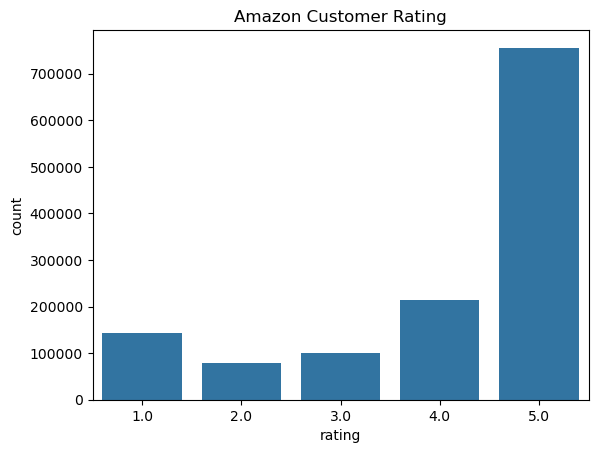

In [66]:
sns.countplot(x="rating", data=clean_data)

plt.title("Amazon Customer Rating")

In [67]:
# Most of the customers are fully stisfied with the products.

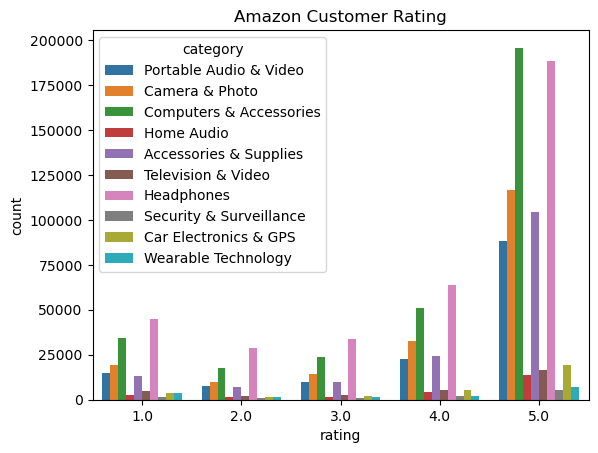

In [68]:
sns.countplot(x="rating", data=clean_data, hue="category")

plt.title("Amazon Customer Rating")

plt.show()

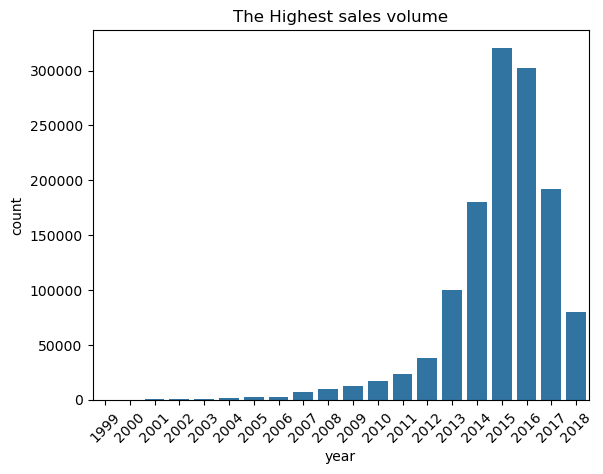

In [69]:
# Which year recorded the highest sales volume?

sns.countplot(x="year", data=clean_data)

plt.title("The Highest sales volume")

plt.xticks(rotation=45)

plt.show()

In [70]:
# 2015 has the most sales volume. followed by 2013, 2014.

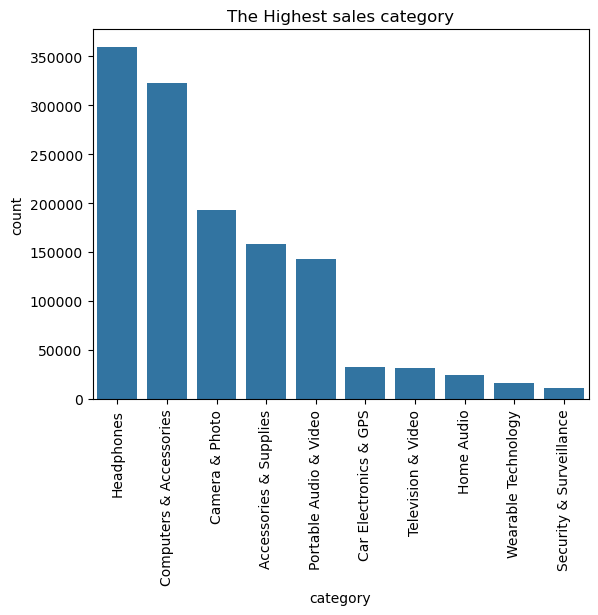

In [71]:
# Which category has the highest sales?

sns.countplot(x="category", data=clean_data, order=clean_data['category'].value_counts().index)

plt.title("The Highest sales category")

plt.xticks(rotation=90)

plt.show()

In [72]:
# Most of the customers bought 'Headphones','Computers & Accessories', 'Camera & Photo'. This are the Top 3 seling category

# least seling category are 'Security & Surveillance', 'Wearable Technology', 'Home Audio'.

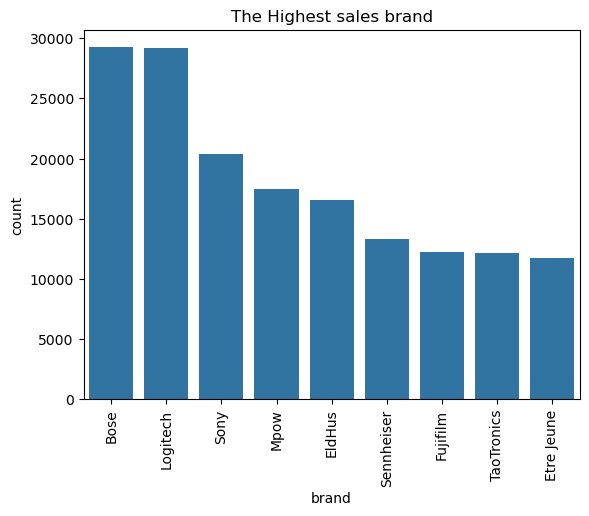

In [73]:
# Which brand has the highest sales?

sns.countplot(x="brand", data=clean_data, order=clean_data['brand'].value_counts().iloc[1:10].index)

#Here we ignoring the 1st highest value which is other. Where we dont have the exact brand names.

plt.title("The Highest sales brand")

plt.xticks(rotation=90)

plt.show()

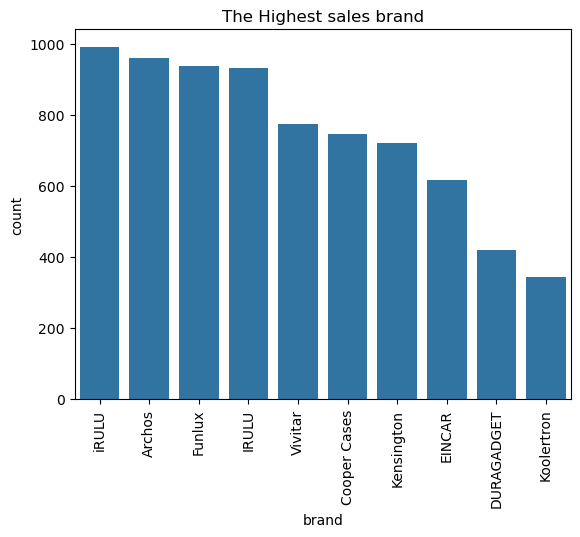

In [74]:
# Which brand has the least sales?

sns.countplot(x="brand", data=clean_data, order=clean_data['brand'].value_counts().iloc[-10:].index)

#Here we ignoring the 1st highest value which is other. Where we dont have the exact brand names.

plt.title("The Highest sales brand")

plt.xticks(rotation=90)

plt.show()

In [75]:
# Bose, Logitech, Sony has the highest sales. 

# Koolertron, Duragadget, Eincar has the least sales.

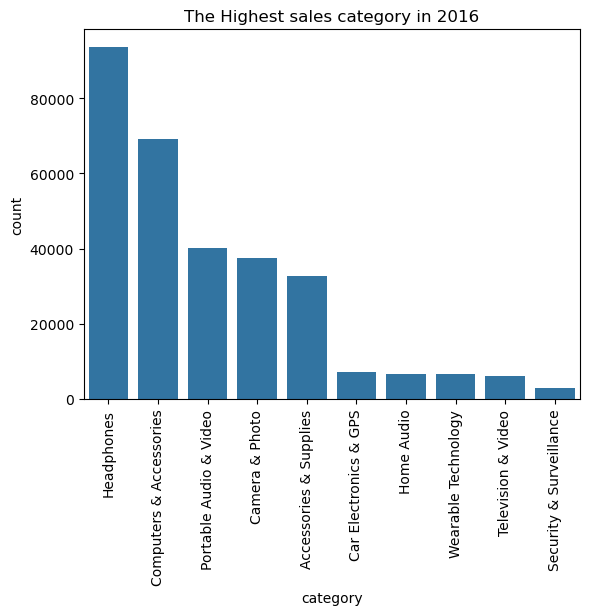

Highest sales category in 2016 is ['Headphones', 'Computers & Accessories', 'Portable Audio & Video']


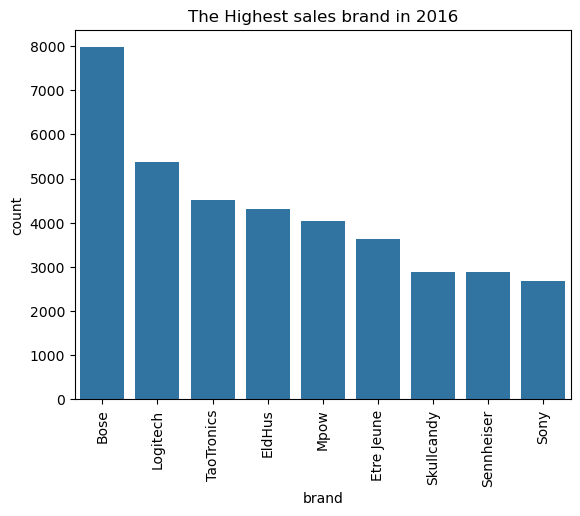

Highest sales brand in 2016 is ['Bose', 'Logitech', 'TaoTronics']


In [76]:
# Lets see the recent year sales according to the category and brand on 2016.

sns.countplot(x="category", data=clean_data[clean_data["year"]==2016], order=clean_data[clean_data["year"]==2016]["category"].value_counts().index)

plt.title("The Highest sales category in 2016")

plt.xticks(rotation=90)

plt.show()

print("Highest sales category in 2016 is",list(clean_data[clean_data["year"].isin([2016])]["category"].value_counts().index)[:3])

# Which brand has the highest sales in 2016?

sns.countplot(x="brand", data=clean_data[clean_data["year"]==2016], order=clean_data[clean_data["year"]==2016]["brand"].value_counts().iloc[1:10].index)

plt.title("The Highest sales brand in 2016")

plt.xticks(rotation=90)

plt.show()

print("Highest sales brand in 2016 is",list(clean_data[clean_data["year"]==2016]["brand"].value_counts().iloc[1:4].index))

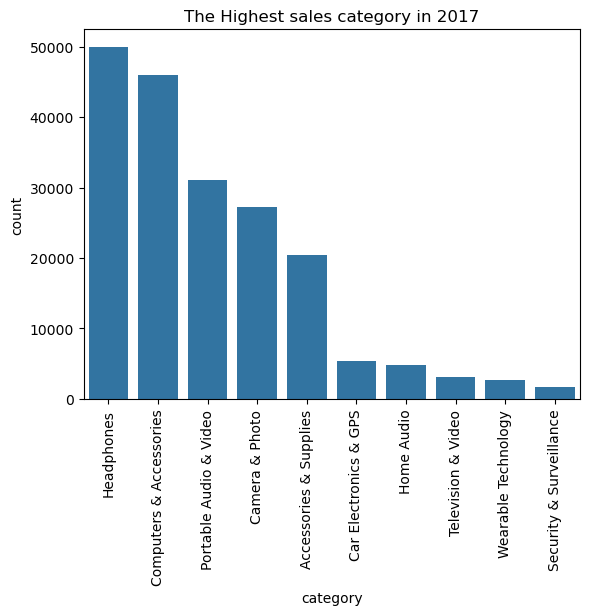

Highest sales category in 2017 is ['Headphones', 'Computers & Accessories', 'Portable Audio & Video']


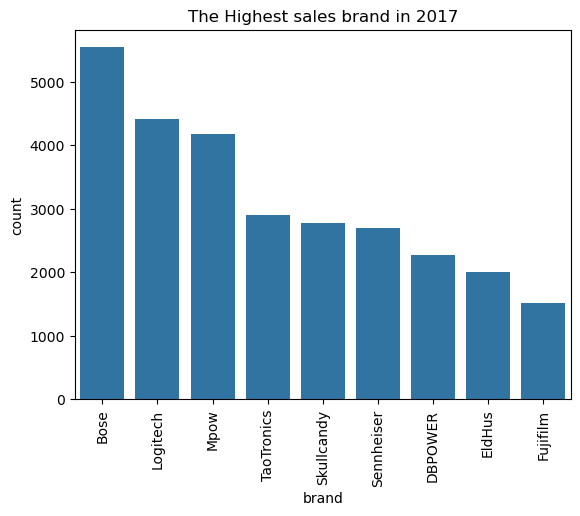

Highest sales brand in 2017 is ['Bose', 'Logitech', 'Mpow']


In [77]:
# Lets see the recent year sales according to the category and brand on 2017.

sns.countplot(x="category", data=clean_data[clean_data["year"].isin([2017])], order=clean_data[clean_data["year"].isin([2017])]["category"].value_counts().index)

plt.title("The Highest sales category in 2017")

plt.xticks(rotation=90)

plt.show()

print("Highest sales category in 2017 is",list(clean_data[clean_data["year"].isin([2017])]["category"].value_counts().index.value_counts().index)[:3])

# Which brand has the highest sales in 2017?

sns.countplot(x="brand", data=clean_data[clean_data["year"]==2017], order=list(clean_data[clean_data["year"]==2017]["brand"].value_counts().iloc[1:10].index) )

plt.title("The Highest sales brand in 2017")

plt.xticks(rotation=90)

plt.show()

print("Highest sales brand in 2017 is",list(clean_data[clean_data["year"]==2017]["brand"].value_counts().iloc[1:10].index)[:3])

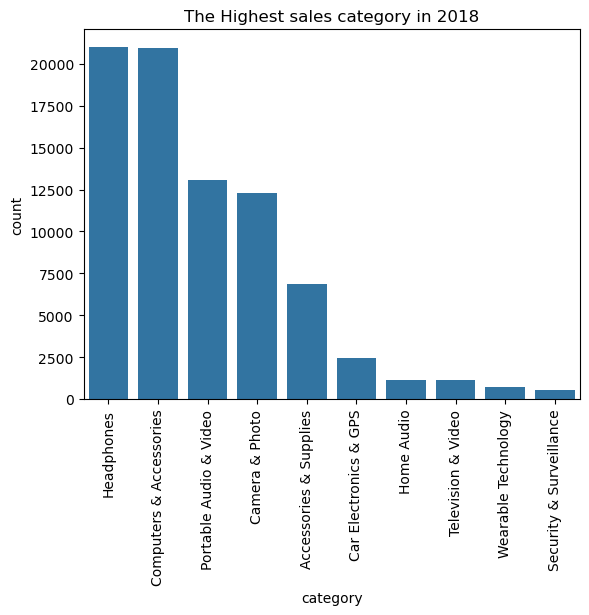

Highest sales category in 2018 is ['Headphones', 'Computers & Accessories', 'Portable Audio & Video']


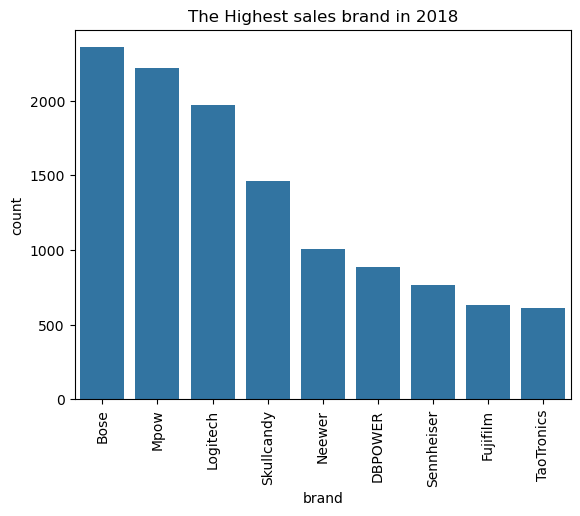

Highest sales brand in 2018 is ['Bose', 'Mpow', 'Logitech']


In [78]:
# Lets see the recent year sales according to the category and brand on 2018.

sns.countplot(x="category", data=clean_data[clean_data["year"].isin([2018])], order=clean_data[clean_data["year"].isin([2018])]["category"].value_counts().index)

plt.title("The Highest sales category in 2018")

plt.xticks(rotation=90)

plt.show()

print("Highest sales category in 2018 is",list(clean_data[clean_data["year"].isin([2018])]["category"].value_counts().index.value_counts().index)[:3])

# Which brand has the highest sales in 2018?

sns.countplot(x="brand", data=clean_data[clean_data["year"]==2018], order=list(clean_data[clean_data["year"]==2018]["brand"].value_counts().iloc[1:10].index) )

plt.title("The Highest sales brand in 2018")

plt.xticks(rotation=90)

plt.show()

print("Highest sales brand in 2018 is",list(clean_data[clean_data["year"]==2018]["brand"].value_counts().iloc[1:10].index)[:3])

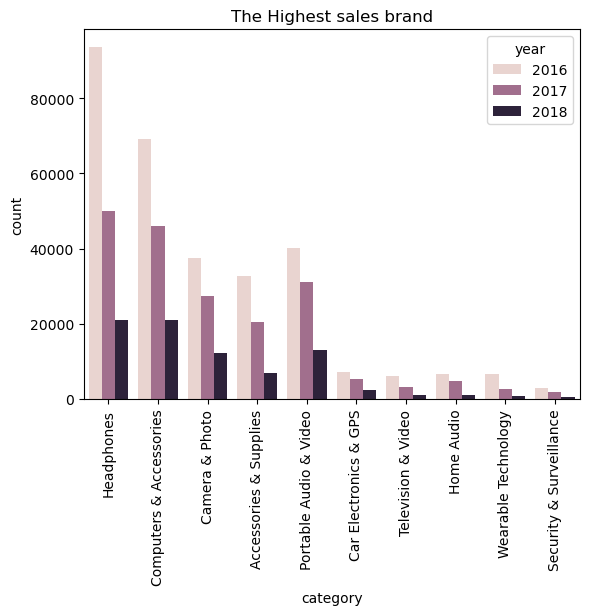

In [79]:
# Lets see the recent year sales according to the category and brand.


sns.countplot(x="category", data=clean_data[clean_data["year"].isin([2016,2017,2018])], order=clean_data["category"].value_counts().index ,hue="year")

#Here we ignoring the 1st highest value which is other. Where we dont have the exact brand names.

plt.title("The Highest sales brand")

plt.xticks(rotation=90)

plt.show()

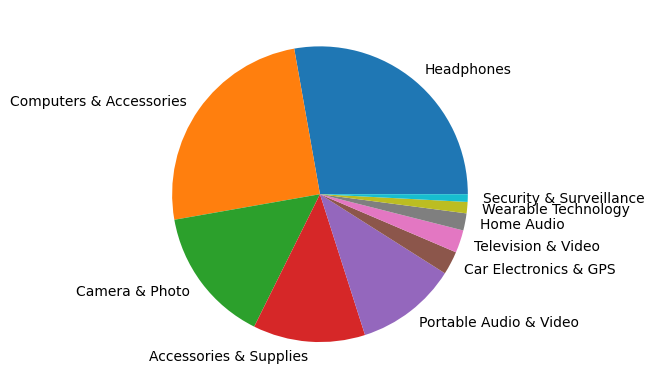

In [80]:
# Sales according to the category 

clean_data.groupby("category")["rating"].count().sort_values(ascending=False).plot(kind="pie")

plt.ylabel(None)

plt.show()

In [81]:
clean_data["month"] = pd.DatetimeIndex(clean_data["timestamp"]).month
clean_data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Other,1999,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Other,1999,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Other,1999,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Other,1999,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Other,1999,7


In [83]:
clean_data["month_name"] = clean_data["month"].apply(lambda x: calendar.month_name[x])

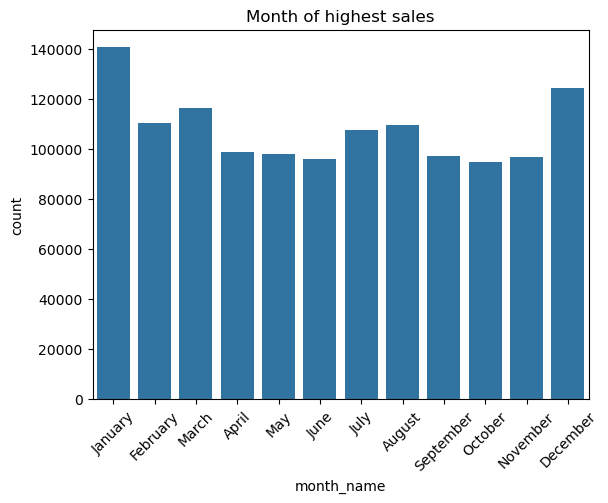

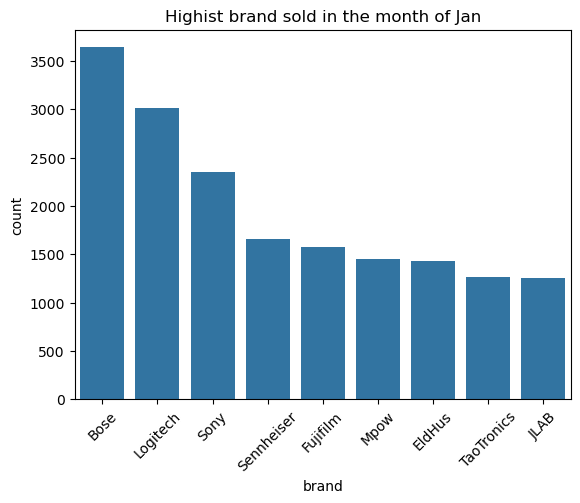

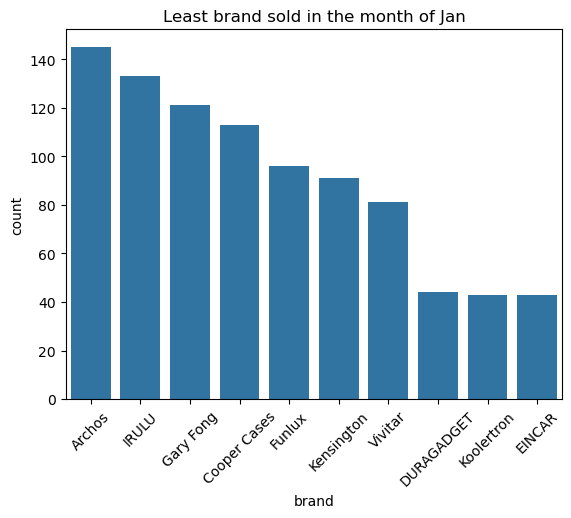

In [102]:
# Whats the month of highest sales?

sns.countplot(x="month_name", data = clean_data, order=[calendar.month_name[x] for x in range(1,13)]) 

plt.title("Month of highest sales")

plt.xticks(rotation=45)

plt.show()

# Whats the highist brand sold in the month of Jan?

sns.countplot(x="brand", data = clean_data[clean_data["month"] == 1], order = clean_data[clean_data["month"] == 1]["brand"].value_counts().iloc[1:10].index )

plt.title("Highist brand sold in the month of Jan")

plt.xticks(rotation=45)

plt.show()

# Whats the least brand sold in the month of Jan?

sns.countplot(x="brand", data = clean_data[clean_data["month"] == 1], order = clean_data[clean_data["month"] == 1]["brand"].value_counts().iloc[-10:].index )

plt.title("Least brand sold in the month of Jan")

plt.xticks(rotation=45)

plt.show()

In [ ]:
# January and December month has the most sales in the complete data.

In [ ]:
# Most of the customers are fully stisfied with the products.

# 2015 has the most sales volume. followed by 2013, 2014.

# January and December month has the most sales in the complete data.

# Most of the customers bought 'Headphones','Computers & Accessories', 'Camera & Photo'. This are the Top 3 seling category

# least seling category are 'Security & Surveillance', 'Wearable Technology', 'Home Audio'.

# Bose, Logitech, Sony has the highest sales. 

# Koolertron, Duragadget, Eincar has the least sales.

#Highest sales category in 2016 is ['Headphones', 'Computers & Accessories', 'Portable Audio & Video']

#Highest sales brand in 2016 is ['Bose', 'Logitech', 'TaoTronics']

#Highest sales category in 2017 is ['Headphones', 'Computers & Accessories', 'Portable Audio & Video']

#Highest sales brand in 2017 is ['Bose', 'Logitech', 'Mpow']

#Highest sales category in 2018 is ['Headphones', 'Computers & Accessories', 'Portable Audio & Video']

#Highest sales brand in 2018 is ['Bose', 'Mpow', 'Logitech']


In [116]:
# Mostly female product sold more.

# ['Headphones', 'Computers & Accessories', 'Portable Audio & Video'] are the top category from the past years.

# ['Bose', 'Mpow', 'Logitech'] are the top leading brand in the past years.

In [118]:
cleaned_data = clean_data.to_csv("cleaned_electronics.csv")